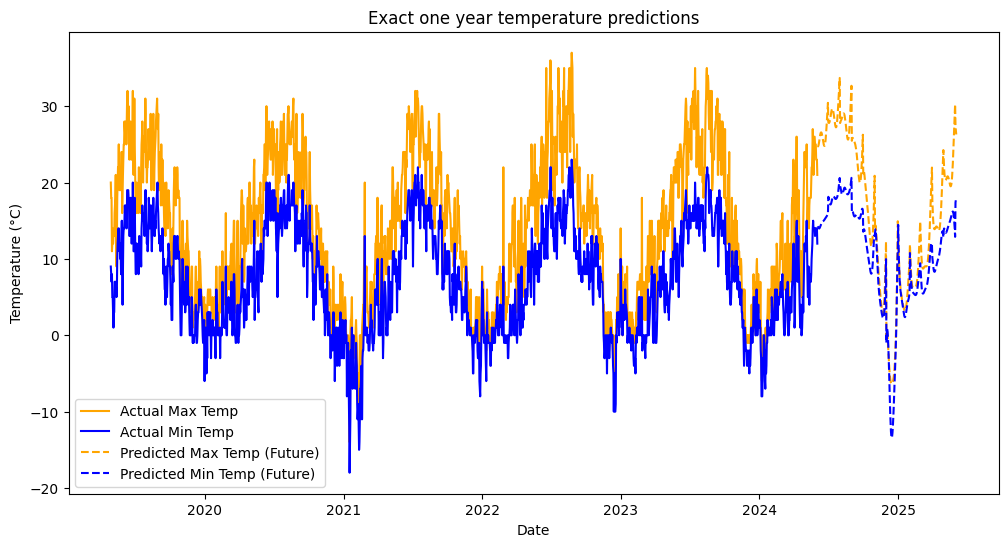

In [33]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime, timedelta

from constants import POLYNOMIAL_DEGREE


def polynomial_features_transform(X):
	# Transforming features into polynomial features
	polynomial_features = PolynomialFeatures(degree=POLYNOMIAL_DEGREE)
	X_poly = polynomial_features.fit_transform(X)
	return X_poly


df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

model_max = joblib.load('models/model_temp_max.pkl')
model_min = joblib.load('models/model_temp_min.pkl')

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- Creating dataframe for one year after dataset data ---

start_date = df.iloc[-1]['date'] + timedelta(days=1)
end_date = start_date + timedelta(days=365)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['was_raining_previous_day'] = 0 # assuming no rain for the plotting purposes

X_poly_max = polynomial_features_transform(future_df[['year', 'month', 'day', 'was_raining_previous_day']])

future_df['temp_max'] = model_max.predict(X_poly_max)

X_poly_min = polynomial_features_transform(future_df[['year', 'month', 'day', 'was_raining_previous_day', 'temp_max']])

future_df['temp_min'] = model_min.predict(X_poly_min)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max'], label='Actual Max Temp', color='orange',)
plt.plot(df['date'], df['temp_min'], label='Actual Min Temp', color='blue')
plt.plot(future_df['date'], future_df['temp_max'], linestyle='--', color='orange', label='Predicted Max Temp (Future)')
plt.plot(future_df['date'], future_df['temp_min'], linestyle='--', color='blue', label='Predicted Min Temp (Future)')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Exact one year temperature predictions')
plt.legend()
plt.show()




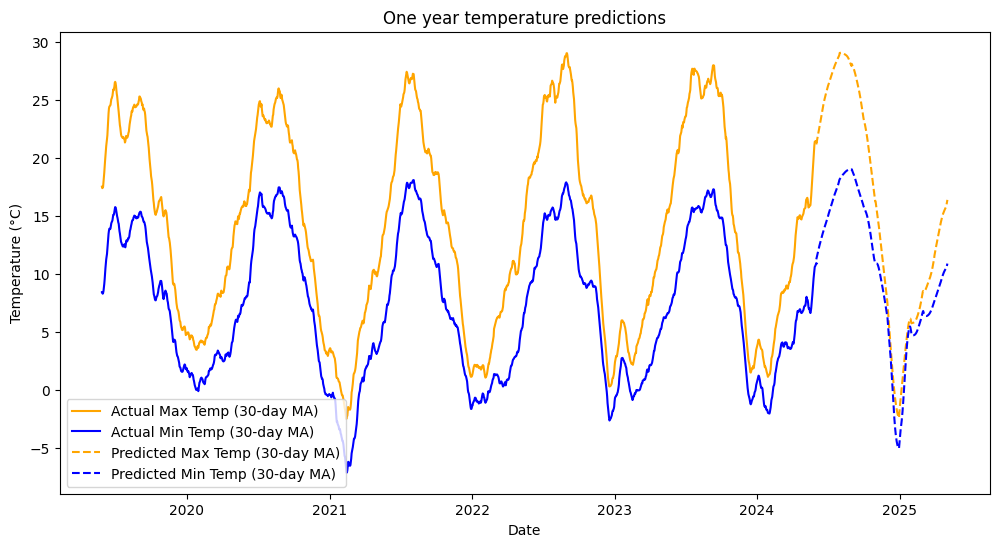

In [32]:
# RUN THE PREVIOUS CELL BEFORE RUNNING THIS ONE


start_date = df.iloc[-1]['date'] - timedelta(days=30)	# Changing to 30 days before because of moving average and to keep plot continuous
end_date = start_date + timedelta(days=365)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['was_raining_previous_day'] = 0 # assuming no rain for the plotting purposes

X_poly_max = polynomial_features_transform(future_df[['year', 'month', 'day', 'was_raining_previous_day']])

future_df['temp_max'] = model_max.predict(X_poly_max)

X_poly_min = polynomial_features_transform(future_df[['year', 'month', 'day', 'was_raining_previous_day', 'temp_max']])

future_df['temp_min'] = model_min.predict(X_poly_min)


# Calculate the rolling mean - moving average (30-day window)
df['temp_max_ma30'] = df['temp_max'].rolling(window=30).mean()
df['temp_min_ma30'] = df['temp_min'].rolling(window=30).mean()

future_df['temp_max_ma30'] = future_df['temp_max'].rolling(window=30).mean()
future_df['temp_min_ma30'] = future_df['temp_min'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max_ma30'], label='Actual Max Temp (30-day MA)', color='orange',)
plt.plot(df['date'], df['temp_min_ma30'], label='Actual Min Temp (30-day MA)', color='blue')
plt.plot(future_df['date'], future_df['temp_max_ma30'], linestyle='--', color='orange', label='Predicted Max Temp (30-day MA)')
plt.plot(future_df['date'], future_df['temp_min_ma30'], linestyle='--', color='blue', label='Predicted Min Temp (30-day MA)')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('One year temperature predictions')
plt.legend()
plt.show()